<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Matias Aedo</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Generar una imagen de una función trigronométrica (función bidimensional) 
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos meustra una onda senoidal. 


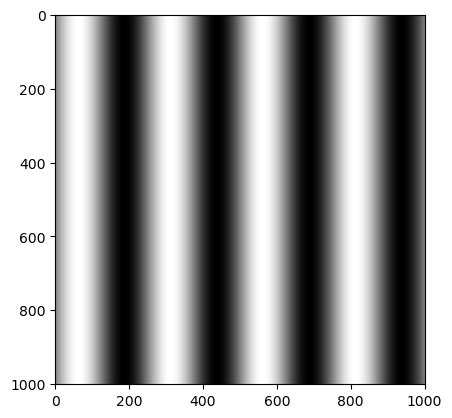

In [85]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x) #Se pasa el arreglo a 2 dimensiones
wavelength = 250 #Longitud de onda
grating = np.sin(2 * np.pi * X / wavelength)
plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

## 2. Generar señales


### 2. Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


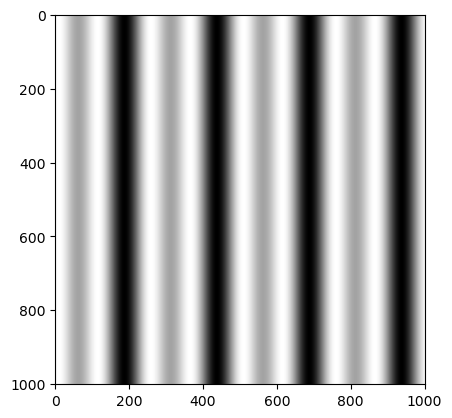

In [36]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
wavelength = 250 #Longitud de onda
grating = np.sin(2 * np.pi * X / wavelength)+np.cos(2*(2 * np.pi * X / wavelength))
plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

### 2.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

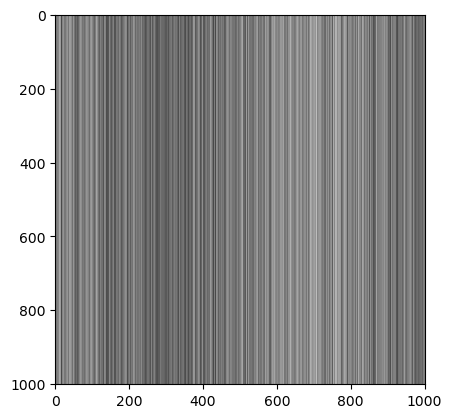

In [49]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
wavelength = 750 #Longitud de onda
grating = np.sin(2 * np.pi * X / wavelength)

## se crea el reuido
noise = 2.5*np.random.randn(len(x))
noiseSignal = grating + noise

## se grafica la señal
plt.set_cmap("gray")
plt.imshow(noiseSignal)
plt.show()

## 3. Análisis en el dominio de Fourier
<p align="justify">
A partir de las señales anteriores, aplica la transformada de Fourier.    


### 3.1 Obtenga la transformada de Fourier para las señales que generaste en el  punto anterior


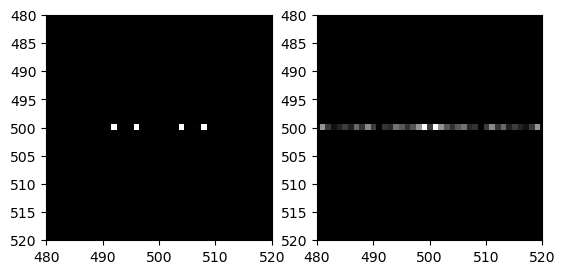

In [83]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
#Señal
wavelength = 250 #Longitud de onda
grating = np.sin(2 * np.pi * X / wavelength)+np.cos(2*(2 * np.pi * X / wavelength))

##señal con Ruido
wavelength1 = 750 #Longitud de onda
Ruido = np.sin(2 * np.pi * X / wavelength1) + 2.5*np.random.randn(len(x))



# Transformada de furier de la señal
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
#Transformada de furier del ruido
ftruido = np.fft.ifftshift(Ruido)
ftruido = np.fft.fft2(ftruido)
ftruido = np.fft.fftshift(ftruido)

plt.set_cmap("gray")

plt.subplot(121)
plt.imshow(abs(ft))
plt.xlim([480, 520]) #Este limite representa el centro del arreglo
plt.ylim([520, 480])

plt.subplot(122)
plt.imshow(abs(ftruido))
plt.xlim([480, 520])
plt.ylim([520, 480])


plt.show()

### 3.2 Obten un resultado Normalizado: 
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

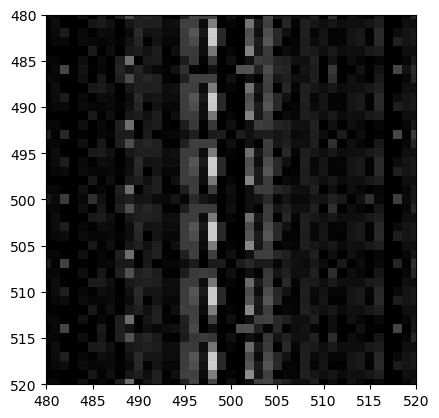

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
##señal con Ruido
wavelength = 750 #Longitud de onda
Ruido = np.sin(2 * np.pi * X / wavelength) + 2.5*np.random.randn(len(x))

#Transformada de furier del ruido
ftruido = np.fft.ifftshift(Ruido)
ftruido = np.fft.fft2(ftruido)
ftruido = np.fft.fftshift(ftruido)

A= preprocessing.normalize(np.real(ftruido))
plt.subplot()
plt.imshow(abs(A))
plt.xlim([480, 520])
plt.ylim([520, 480])

plt.show()

### 3.3 Encuentra la transformada inversa de Fourier
_solo para una señal de las dos que generaste inicialmente_ En este caso puede usar una librería. Explica en detalle que hace la librería y el resultado que arroja.

### 3.4 Escriba un algoritmo para la Transformada Discreta de Fourier(DFT) 2-D y muéstrelo 
_solo para una señal de las dos que generaste inicialmente_
Aquí debe implementar el algoritmo de DFT, es decir, NO puedes usar paquetes externos para calcular la transformada.

### 3.5 Explica tus hallazgos
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

In [ ]:
El primer ruido generado con el coseno se puede ver como cambia la imagen de una forma mas uniforme y se puede apreciar la cantidad de ondas generadas ya que con el ruido gausiano las muestras son aleatorias y no se puede apreciar la señal original
La transformada de fourier representa las sinusoides usadas en las mallas sinusoidales ya que cada sinusoide de la transformada tiene 1 par de puntos simetricamente separados, y cuando se agrega el coseno se puede apreciar los 2 pares de puntos siendo uno el coseno y el seno


## 4. Referencias
<p align="justify">
    


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html